In [1]:
import requests
import pandas as pd
import json
from cred import credentials
from request_api import get_genesis_api
from sql import get_data

In [2]:
cinema = get_data('SELECT * FROM cinema_formatted')
cinema

/opt/homebrew/Caskroom/miniconda/base/envs/sql-practice/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,bundesland,year,Bruttoeinnahmen_aus_dem_Filmbesuch_Mill._EUR,Durchschnittlicher_Kino-Eintrittspreis_EUR,Filmbesuche_Mill.,Filmbesuche_je_Einwohner_Anzahl,Kinos_Anzahl,Leinwände_Anzahl,Sitzplätze_der_Kinos_Anzahl
0,Baden-Württemberg,2000,103.2,5.57,18.5,1.8,258.0,626.0,110626.0
1,Baden-Württemberg,2001,127.2,5.67,22.4,2.1,249.0,621.0,110251.0
2,Baden-Württemberg,2002,125.3,5.89,21.3,2.0,252.0,629.0,109265.0
3,Baden-Württemberg,2003,112.1,5.79,19.3,1.8,262.0,656.0,111429.0
4,Baden-Württemberg,2004,120.6,5.81,20.8,1.9,260.0,656.0,112175.0
...,...,...,...,...,...,...,...,...,...
331,Thüringen,2016,19.6,8.19,2.4,1.1,49.0,138.0,18669.0
332,Thüringen,2017,20.2,8.42,2.4,1.1,47.0,136.0,18543.0
333,Thüringen,2018,17.5,8.24,2.1,1.0,48.0,138.0,18543.0
334,Thüringen,2019,19.9,8.47,2.4,1.1,48.0,138.0,18288.0


In [ ]:
cinema.drop(columns=['Bruttoeinnahmen_aus_dem_Filmbesuch_Mill._EUR', 'Durchschnittlicher_Kino-Eintrittspreis_EUR', 'Filmbesuche_Mill.', 'Filmbesuche_je_Einwohner_Anzahl'], inplace=True)
cinema


In [14]:
cinema.drop(columns='Leinwände_Anzahl', inplace=True)

In [28]:
cinema.rename(columns={'bundesland':'state','Sitzplätze_der_Kinos_Anzahl':'seats_num', 'Kinos_Anzahl': 'kinos_num'}, inplace=True)
cinema

,state,year,kinos_num,seats_num
0,Baden-Württemberg,2000,258.0,110626.0
1,Baden-Württemberg,2001,249.0,110251.0
2,Baden-Württemberg,2002,252.0,109265.0
3,Baden-Württemberg,2003,262.0,111429.0
4,Baden-Württemberg,2004,260.0,112175.0
...,...,...,...,...
331,Thüringen,2016,49.0,18669.0
332,Thüringen,2017,47.0,18543.0
333,Thüringen,2018,48.0,18543.0
334,Thüringen,2019,48.0,18288.0


In [21]:
museum = get_data('SELECT * FROM museum_formatted')
museum.drop(columns=['Ausstellungen_Anzahl'], inplace=True)


/opt/homebrew/Caskroom/miniconda/base/envs/sql-practice/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,bundesland,year,Museen_Anzahl,Museumsbesuche_1000
0,Baden-Württemberg,2002,830,14110
1,Baden-Württemberg,2003,825,12990
2,Baden-Württemberg,2004,821,13600
3,Baden-Württemberg,2005,819,13711
4,Baden-Württemberg,2006,784,14005
...,...,...,...,...
283,Thüringen,2015,213,4344
284,Thüringen,2016,209,4477
285,Thüringen,2017,196,4424
286,Thüringen,2018,196,3995


In [29]:
museum.rename(columns={'bundesland':'state'}, inplace=True)

In [23]:
genehmigung = pd.read_csv('data/genehmigung.csv', index_col=0)
genehmigung_wg = genehmigung.drop(columns=['Nwohngebäude_num', 'area_NWg', 'rooms_NWg'])
genehmigung_wg

,bundesland,year,Wohngebäude_num,area_Wg,rooms_Wg
0,Baden-Württemberg,2008,20181,902,125979
1,Baden-Württemberg,2009,20243,935,126624
2,Baden-Württemberg,2010,21441,1005,137168
3,Baden-Württemberg,2011,23868,1211,155733
4,Baden-Württemberg,2012,23118,1257,157525
...,...,...,...,...,...
219,Thüringen,2017,3736,18,22002
220,Thüringen,2018,3648,58,21541
221,Thüringen,2019,3493,41,21262
222,Thüringen,2020,3795,58,23319


In [30]:
genehmigung_wg.rename(columns={'bundesland':'state'}, inplace=True)

In [6]:
apartments = get_data('SELECT * FROM apartments_bundesland_rooms')
apartments

/opt/homebrew/Caskroom/miniconda/base/envs/sql-practice/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,bundesland_index,bundesland,1 room,2 rooms,3 rooms,4 rooms,5 rooms,6 rooms,7 or more rooms,Total,year
0,0,Baden-Württemberg,115753,231880,775499,1290496,932786,533914,523079,4403407,1995
1,1,Bayern,166441,325148,997947,1347338,1012566,643603,707165,5200208,1995
2,2,Berlin,24299,257454,649536,537402,213152,57915,30588,1770346,1995
3,3,Brandenburg,7293,76754,263661,418162,210730,80832,43997,1101429,1995
4,4,Bremen,8629,18454,87926,117815,62114,25362,16122,336422,1995
...,...,...,...,...,...,...,...,...,...,...,...
411,11,Saarland,9930,29510,83830,119857,94375,80559,102782,520843,2020
412,12,Sachsen,79132,249141,667370,712123,354111,183335,138520,2383732,2020
413,13,Sachsen-Anhalt,33256,117815,318966,387760,225318,118669,92996,1294780,2020
414,14,Schleswig-Holstein,39230,137505,312431,360467,297722,190180,179697,1517232,2020


In [31]:
apartments.rename(columns={'bundesland':'state'}, inplace=True)

In [7]:
apartments.columns

Index(['bundesland_index', 'bundesland', '1 room', '2 rooms', '3 rooms',
       '4 rooms', '5 rooms', '6 rooms', '7 or more rooms', 'Total', 'year'],
      dtype='object')

In [9]:
apartments.drop(columns=['bundesland_index', '1 room', '2 rooms', '3 rooms',
       '4 rooms', '5 rooms', '6 rooms', '7 or more rooms'], inplace=True)

In [10]:
apartments

,bundesland,Total,year
0,Baden-Württemberg,4403407,1995
1,Bayern,5200208,1995
2,Berlin,1770346,1995
3,Brandenburg,1101429,1995
4,Bremen,336422,1995
...,...,...,...
411,Saarland,520843,2020
412,Sachsen,2383732,2020
413,Sachsen-Anhalt,1294780,2020
414,Schleswig-Holstein,1517232,2020


In [119]:
restaurants = pd.read_csv('data/restaurants_per_bundesland.csv', index_col=0)
restaurants.drop(columns='avg_rating', inplace=True)


In [32]:
restaurants.rename(columns={'bundesland':'state'}, inplace=True)

In [24]:
population = pd.read_csv('data/population_avg_age_with_country.csv', index_col=0)
population

,year,state,age_avg,total_population,country
0,2000,Baden-Württemberg,39.681041,10524415,Germany
1,2000,Bayern,40.042644,12230255,Germany
2,2000,Berlin,40.522362,3382169,Germany
3,2000,Brandenburg,40.749223,2601962,Germany
4,2000,Bremen,42.060658,660225,Germany
...,...,...,...,...,...
811,2050,Saarland,47.602190,822000,Germany
812,2050,Sachsen,46.823152,3585000,Germany
813,2050,Sachsen-Anhalt,48.502364,1692000,Germany
814,2050,Schleswig-Holstein,48.137918,2661000,Germany


In [41]:
pop_genehmigung = population.merge(genehmigung_wg, on=['state', 'year'])

In [42]:
pop_genehmigung

,year,state,age_avg,total_population,country,Wohngebäude_num,area_Wg,rooms_Wg
0,2008,Baden-Württemberg,41.719779,10749506,Germany,20181,902,125979
1,2008,Bayern,41.929931,12519728,Germany,25024,916,168757
2,2008,Berlin,42.153147,3431675,Germany,2892,24,27210
3,2008,Brandenburg,44.414482,2522493,Germany,5978,35,31940
4,2008,Bremen,43.165608,661866,Germany,705,10,4380
...,...,...,...,...,...,...,...,...
219,2021,Saarland,45.171254,981000,Germany,1846,38,10837
220,2021,Sachsen,45.463331,4077000,Germany,8253,125,56177
221,2021,Sachsen-Anhalt,46.907331,2169000,Germany,4494,21,25106
222,2021,Schleswig-Holstein,44.744433,2919000,Germany,9764,231,60711


In [43]:
pop_genehmigung['new_building)_per_resident'] = pop_genehmigung['Wohngebäude_num']/pop_genehmigung['total_population']
pop_genehmigung

,year,state,age_avg,total_population,country,Wohngebäude_num,area_Wg,rooms_Wg,new_building)_per_resident
0,2008,Baden-Württemberg,41.719779,10749506,Germany,20181,902,125979,0.001877
1,2008,Bayern,41.929931,12519728,Germany,25024,916,168757,0.001999
2,2008,Berlin,42.153147,3431675,Germany,2892,24,27210,0.000843
3,2008,Brandenburg,44.414482,2522493,Germany,5978,35,31940,0.002370
4,2008,Bremen,43.165608,661866,Germany,705,10,4380,0.001065
...,...,...,...,...,...,...,...,...,...
219,2021,Saarland,45.171254,981000,Germany,1846,38,10837,0.001882
220,2021,Sachsen,45.463331,4077000,Germany,8253,125,56177,0.002024
221,2021,Sachsen-Anhalt,46.907331,2169000,Germany,4494,21,25106,0.002072
222,2021,Schleswig-Holstein,44.744433,2919000,Germany,9764,231,60711,0.003345


In [44]:
pop_genehmigung['new_rooms_per_resident'] = pop_genehmigung['rooms_Wg']/pop_genehmigung['total_population']
pop_genehmigung

,year,state,age_avg,total_population,country,Wohngebäude_num,area_Wg,rooms_Wg,new_building)_per_resident,new_rooms_per_resident
0,2008,Baden-Württemberg,41.719779,10749506,Germany,20181,902,125979,0.001877,0.011720
1,2008,Bayern,41.929931,12519728,Germany,25024,916,168757,0.001999,0.013479
2,2008,Berlin,42.153147,3431675,Germany,2892,24,27210,0.000843,0.007929
3,2008,Brandenburg,44.414482,2522493,Germany,5978,35,31940,0.002370,0.012662
4,2008,Bremen,43.165608,661866,Germany,705,10,4380,0.001065,0.006618
...,...,...,...,...,...,...,...,...,...,...
219,2021,Saarland,45.171254,981000,Germany,1846,38,10837,0.001882,0.011047
220,2021,Sachsen,45.463331,4077000,Germany,8253,125,56177,0.002024,0.013779
221,2021,Sachsen-Anhalt,46.907331,2169000,Germany,4494,21,25106,0.002072,0.011575
222,2021,Schleswig-Holstein,44.744433,2919000,Germany,9764,231,60711,0.003345,0.020799


In [45]:
pop_genehmigung.rename(columns={'new_building)_per_resident':'new_building_per_resident'}, inplace=True)

In [49]:
pop_genehmigung_2020 = pop_genehmigung.query('year == 2020')

In [52]:
min_2020 = pop_genehmigung_2020.min()
min_2020

year                                      2020
state                        Baden-Württemberg
age_avg                              41.608811
total_population                        680130
country                                Germany
Wohngebäude_num                            778
area_Wg                                     -1
rooms_Wg                                  6223
new_building_per_resident              0.00083
new_rooms_per_resident                 0.00915
dtype: object

In [55]:
max_2020 = pop_genehmigung_2020.max()
max_2020

year                              2020
state                        Thüringen
age_avg                      47.536632
total_population              17925570
country                        Germany
Wohngebäude_num                  40427
area_Wg                           1948
rooms_Wg                        283342
new_building_per_resident     0.003254
new_rooms_per_resident        0.021563
dtype: object

In [64]:
columns = ['new_building_per_resident', 'new_rooms_per_resident']
for col in columns:
    pop_genehmigung_2020['scaled_%s' % col] = pop_genehmigung_2020[col].map(lambda x: (x - min_2020[col]) / (max_2020[col] - min_2020[col]))
pop_genehmigung_2020

/var/folders/_k/3v2l6rmd5m3gnk2prt6lj__h0000gn/T/ipykernel_61202/872092196.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_genehmigung_2020['scaled_%s' % col] = pop_genehmigung_2020[col].map(lambda x: (x - min_2020[col]) / (max_2020[col] - min_2020[col]))


,year,state,age_avg,total_population,country,Wohngebäude_num,area_Wg,rooms_Wg,new_building_per_resident,new_rooms_per_resident,scaled_new_building_per_resident,scaled_new_rooms_per_resident
192,2020,Baden-Württemberg,43.240650,11103043,Germany,26600,1402,186843,0.002396,0.016828,0.645766,0.618560
193,2020,Bayern,43.488237,13140183,Germany,40427,1948,283342,0.003077,0.021563,0.926662,1.000000
194,2020,Berlin,42.149704,3664088,Germany,3043,156,53307,0.000830,0.014549,0.000000,0.434919
195,2020,Brandenburg,46.722180,2531071,Germany,8237,131,53611,0.003254,0.021181,1.000000,0.969237
196,2020,Bremen,43.143783,680130,Germany,778,35,6223,0.001144,0.009150,0.129300,0.000000
197,2020,Hamburg,41.608811,1852478,Germany,2221,139,31096,0.001199,0.016786,0.152006,0.615183
198,2020,Hessen,43.518179,6293154,Germany,12237,494,97673,0.001944,0.015521,0.459598,0.513223
199,2020,Mecklenburg-Vorpommern,46.846078,1610774,Germany,3454,68,24681,0.002144,0.015322,0.542035,0.497267
200,2020,Niedersachsen,44.270348,8003421,Germany,22024,714,155134,0.002752,0.019383,0.792674,0.824418
201,2020,Nordrhein-Westfalen,43.759486,17925570,Germany,30352,821,228644,0.001693,0.012755,0.355932,0.290452


In [65]:
pop_g_c = pop_genehmigung_2020.merge(cinema.query('year == 2020'))
pop_g_c

,year,state,age_avg,total_population,country,Wohngebäude_num,area_Wg,rooms_Wg,new_building_per_resident,new_rooms_per_resident,scaled_new_building_per_resident,scaled_new_rooms_per_resident,kinos_num,seats_num
0,2020,Baden-Württemberg,43.240650,11103043,Germany,26600,1402,186843,0.002396,0.016828,0.645766,0.618560,252.0,100970.0
1,2020,Bayern,43.488237,13140183,Germany,40427,1948,283342,0.003077,0.021563,0.926662,1.000000,284.0,125431.0
2,2020,Berlin,42.149704,3664088,Germany,3043,156,53307,0.000830,0.014549,0.000000,0.434919,95.0,48373.0
3,2020,Brandenburg,46.722180,2531071,Germany,8237,131,53611,0.003254,0.021181,1.000000,0.969237,64.0,24371.0
4,2020,Bremen,43.143783,680130,Germany,778,35,6223,0.001144,0.009150,0.129300,0.000000,12.0,11791.0
5,2020,Hamburg,41.608811,1852478,Germany,2221,139,31096,0.001199,0.016786,0.152006,0.615183,33.0,20595.0
6,2020,Hessen,43.518179,6293154,Germany,12237,494,97673,0.001944,0.015521,0.459598,0.513223,128.0,56589.0
7,2020,Mecklenburg-Vorpommern,46.846078,1610774,Germany,3454,68,24681,0.002144,0.015322,0.542035,0.497267,79.0,19778.0
8,2020,Niedersachsen,44.270348,8003421,Germany,22024,714,155134,0.002752,0.019383,0.792674,0.824418,177.0,69454.0
9,2020,Nordrhein-Westfalen,43.759486,17925570,Germany,30352,821,228644,0.001693,0.012755,0.355932,0.290452,273.0,171030.0


In [67]:
pop_g_c['kino_seats-per_r'] = pop_g_c['seats_num'] / pop_g_c['total_population']
pop_g_c.rename(columns={'kino_seats-per_r':'kino_seats_per_r'}, inplace=True)

In [75]:
pop_g_c_m = pop_g_c.merge(museum.query('year == 2019')[['Museen_Anzahl','state']], on='state')
pop_g_c_m.drop(columns=['scaled_new_building_per_resident', 'scaled_new_rooms_per_resident'],inplace=True)

In [82]:
pop_g_c_m_a = pop_g_c_m.merge(apartments.query('year == 2020')).rename(columns={'Wohngebäude_num':'new_building','Museen_Anzahl':'museum', 'kinos_num': 'kino','seats_num':'kino_seat','Total':'apartment'})
pop_g_c_m_a.drop(columns=['new_building_per_resident', 'new_rooms_per_resident','kino_seats_per_r'],inplace=True)

In [83]:
pop_g_c_m_a

,year,state,age_avg,total_population,country,new_building,area_Wg,rooms_Wg,kino,kino_seat,museum,apartment
0,2020,Baden-Württemberg,43.240650,11103043,Germany,26600,1402,186843,252.0,100970.0,841,5373419
1,2020,Bayern,43.488237,13140183,Germany,40427,1948,283342,284.0,125431.0,590,6549811
2,2020,Berlin,42.149704,3664088,Germany,3043,156,53307,95.0,48373.0,147,1982825
3,2020,Brandenburg,46.722180,2531071,Germany,8237,131,53611,64.0,24371.0,225,1348702
4,2020,Bremen,43.143783,680130,Germany,778,35,6223,12.0,11791.0,27,363969
5,2020,Hamburg,41.608811,1852478,Germany,2221,139,31096,33.0,20595.0,40,976709
6,2020,Hessen,43.518179,6293154,Germany,12237,494,97673,128.0,56589.0,304,3081216
7,2020,Mecklenburg-Vorpommern,46.846078,1610774,Germany,3454,68,24681,79.0,19778.0,146,921785
8,2020,Niedersachsen,44.270348,8003421,Germany,22024,714,155134,177.0,69454.0,492,4057466
9,2020,Nordrhein-Westfalen,43.759486,17925570,Germany,30352,821,228644,273.0,171030.0,557,9108208


In [96]:
pop_g_c_m_a

,year,state,age_avg,total_population,country,new_building,area_Wg,rooms_Wg,kino,kino_seat,museum,apartment
0,2020,Baden-Württemberg,43.240650,11103043,Germany,26600,1402,186843,252.0,100970.0,841,5373419
1,2020,Bayern,43.488237,13140183,Germany,40427,1948,283342,284.0,125431.0,590,6549811
2,2020,Berlin,42.149704,3664088,Germany,3043,156,53307,95.0,48373.0,147,1982825
3,2020,Brandenburg,46.722180,2531071,Germany,8237,131,53611,64.0,24371.0,225,1348702
4,2020,Bremen,43.143783,680130,Germany,778,35,6223,12.0,11791.0,27,363969
5,2020,Hamburg,41.608811,1852478,Germany,2221,139,31096,33.0,20595.0,40,976709
6,2020,Hessen,43.518179,6293154,Germany,12237,494,97673,128.0,56589.0,304,3081216
7,2020,Mecklenburg-Vorpommern,46.846078,1610774,Germany,3454,68,24681,79.0,19778.0,146,921785
8,2020,Niedersachsen,44.270348,8003421,Germany,22024,714,155134,177.0,69454.0,492,4057466
9,2020,Nordrhein-Westfalen,43.759486,17925570,Germany,30352,821,228644,273.0,171030.0,557,9108208


In [121]:
restaurants.rename(columns={'bundesland':'state'},inplace=True)

In [123]:
restaurants.sort_values(by='state', inplace=True)
restaurants['state'] = restaurants['state'].map(states_map)
# restaurants.drop(columns='bundesland', inplace=True)

In [124]:
restaurants

,state,year,rest_num
0,Baden-Württemberg,2020,16236
1,Bayern,2020,21531
2,Berlin,2020,7217
3,Brandenburg,2020,2378
4,Hamburg,2020,3625
5,Hessen,2020,9845
6,Niedersachsen,2020,9232
7,Mecklenburg-Vorpommern,2020,2634
8,Nordrhein-Westfalen,2020,21116
9,Rheinland-Pfalz,2020,6651


In [113]:
states_en = [
    'Baden-Württemberg',
    'Bayern',
    'Berlin',
    'Brandenburg',
    'Hamburg',
    'Hessen',
    'Niedersachsen',
    'Mecklenburg-Vorpommern',
    'Nordrhein-Westfalen',
    'Rheinland-Pfalz',
    'Saarland',
    'Sachsen',
    'Sachsen-Anhalt',
    'Schleswig-Holstein',
    'Bremen',
    'Thüringen'
]
states_map = dict(zip(list(restaurants.state), states_en))
states_map

{'Baden-Wurttemberg': 'Baden-Württemberg',
 'Bavaria': 'Bayern',
 'Berlin': 'Berlin',
 'Brandenburg': 'Brandenburg',
 'Hamburg': 'Hamburg',
 'Hesse': 'Hessen',
 'Lower Saxony': 'Niedersachsen',
 'Mecklenburg-West Pomerania': 'Mecklenburg-Vorpommern',
 'North Rhine-Westphalia': 'Nordrhein-Westfalen',
 'Rhineland-Palatinate': 'Rheinland-Pfalz',
 'Saarland': 'Saarland',
 'Saxony': 'Sachsen',
 'Saxony-Anhalt': 'Sachsen-Anhalt',
 'Schleswig-Holstein': 'Schleswig-Holstein',
 'State of Bremen': 'Bremen',
 'Thuringia': 'Thüringen'}

In [125]:
result = pop_g_c_m_a.merge(restaurants)
# result.drop(columns='avg_rating', inplace=True)

In [94]:
result.rename(columns={'area_Wg':'building_area', 'rooms_Wg': 'building_rooms','restaurants': 'restaurant'}, inplace=True)

In [127]:
result.rename(columns={'rest_num':'restaurant'}, inplace=True)

In [128]:
result.columns

Index(['year', 'state', 'age_avg', 'total_population', 'country',
       'new_building', 'area_Wg', 'rooms_Wg', 'kino', 'kino_seat', 'museum',
       'apartment', 'restaurant'],
      dtype='object')

In [137]:
columns = ['age_avg', 'new_building', 'area_Wg', 'rooms_Wg', 'kino', 'kino_seat', 'museum',
       'apartment', 'restaurant']

for col in columns:
    result['%s_per_resident' % col] = result[col] / result['total_population']

min_2020 = result.min()
max_2020 = result.max()

for col in columns:
    col_pr = '%s_per_resident' % col
    result['scaled_%s' % col] = result[col_pr].map(lambda x: (x - min_2020[col_pr]) / (max_2020[col_pr] - min_2020[col_pr]))
result

,year,state,age_avg,total_population,country,new_building,area_Wg,rooms_Wg,kino,kino_seat,...,scaled_area_Wg,scaled_rooms_Wg,scaled_kino,scaled_kino_seat,scaled_museum,scaled_apartment,scaled_restaurant,score,age_avg_per_resident,scaled_age_avg
0,2020,Baden-Württemberg,43.240650,11103043,Germany,26600,1402,186843,252.0,100970.0,...,0.852220,0.618560,0.220814,0.142081,0.784282,0.000000,0.556773,3.820496,0.000004,0.023827
1,2020,Bayern,43.488237,13140183,Germany,40427,1948,283342,284.0,125431.0,...,1.000000,1.000000,0.188775,0.189097,0.337564,0.132047,0.710754,4.484899,0.000003,0.014237
2,2020,Berlin,42.149704,3664088,Germany,3043,156,53307,95.0,48373.0,...,0.289389,0.434919,0.316358,0.569664,0.268316,0.520919,1.000000,3.399566,0.000012,0.148578
3,2020,Brandenburg,46.722180,2531071,Germany,8237,131,53611,64.0,24371.0,...,0.351131,0.969237,0.297385,0.197749,0.974735,0.445386,0.100073,4.335696,0.000018,0.262623
4,2020,Bremen,43.143783,680130,Germany,778,35,6223,12.0,11791.0,...,0.349140,0.000000,0.071390,1.000000,0.262221,0.466226,0.643403,2.921681,0.000063,1.000000
5,2020,Hamburg,41.608811,1852478,Germany,2221,139,31096,33.0,20595.0,...,0.507667,0.615183,0.076425,0.352711,0.000000,0.394256,0.988801,3.087049,0.000022,0.328232
6,2020,Hessen,43.518179,6293154,Germany,12237,494,97673,128.0,56589.0,...,0.530957,0.513223,0.151114,0.131490,0.386893,0.051506,0.645965,2.870746,0.000007,0.073352
7,2020,Mecklenburg-Vorpommern,46.846078,1610774,Germany,3454,68,24681,79.0,19778.0,...,0.286971,0.497267,1.000000,0.473557,1.000000,0.804288,0.707851,5.311969,0.000029,0.436798
8,2020,Niedersachsen,44.270348,8003421,Germany,22024,714,155134,177.0,69454.0,...,0.603004,0.824418,0.203634,0.098796,0.577593,0.209557,0.287010,3.596684,0.000006,0.050665
9,2020,Nordrhein-Westfalen,43.759486,17925570,Germany,30352,821,228644,273.0,171030.0,...,0.311077,0.290452,0.000000,0.188630,0.137301,0.219996,0.308391,1.811780,0.000002,0.000000


In [138]:
result['score'] = [0] * 16
for col in columns:
    result['score'] += result['scaled_%s' % col]
result

,year,state,age_avg,total_population,country,new_building,area_Wg,rooms_Wg,kino,kino_seat,...,scaled_area_Wg,scaled_rooms_Wg,scaled_kino,scaled_kino_seat,scaled_museum,scaled_apartment,scaled_restaurant,score,age_avg_per_resident,scaled_age_avg
0,2020,Baden-Württemberg,43.240650,11103043,Germany,26600,1402,186843,252.0,100970.0,...,0.852220,0.618560,0.220814,0.142081,0.784282,0.000000,0.556773,3.844323,0.000004,0.023827
1,2020,Bayern,43.488237,13140183,Germany,40427,1948,283342,284.0,125431.0,...,1.000000,1.000000,0.188775,0.189097,0.337564,0.132047,0.710754,4.499136,0.000003,0.014237
2,2020,Berlin,42.149704,3664088,Germany,3043,156,53307,95.0,48373.0,...,0.289389,0.434919,0.316358,0.569664,0.268316,0.520919,1.000000,3.548144,0.000012,0.148578
3,2020,Brandenburg,46.722180,2531071,Germany,8237,131,53611,64.0,24371.0,...,0.351131,0.969237,0.297385,0.197749,0.974735,0.445386,0.100073,4.598319,0.000018,0.262623
4,2020,Bremen,43.143783,680130,Germany,778,35,6223,12.0,11791.0,...,0.349140,0.000000,0.071390,1.000000,0.262221,0.466226,0.643403,3.921681,0.000063,1.000000
5,2020,Hamburg,41.608811,1852478,Germany,2221,139,31096,33.0,20595.0,...,0.507667,0.615183,0.076425,0.352711,0.000000,0.394256,0.988801,3.415281,0.000022,0.328232
6,2020,Hessen,43.518179,6293154,Germany,12237,494,97673,128.0,56589.0,...,0.530957,0.513223,0.151114,0.131490,0.386893,0.051506,0.645965,2.944097,0.000007,0.073352
7,2020,Mecklenburg-Vorpommern,46.846078,1610774,Germany,3454,68,24681,79.0,19778.0,...,0.286971,0.497267,1.000000,0.473557,1.000000,0.804288,0.707851,5.748766,0.000029,0.436798
8,2020,Niedersachsen,44.270348,8003421,Germany,22024,714,155134,177.0,69454.0,...,0.603004,0.824418,0.203634,0.098796,0.577593,0.209557,0.287010,3.647350,0.000006,0.050665
9,2020,Nordrhein-Westfalen,43.759486,17925570,Germany,30352,821,228644,273.0,171030.0,...,0.311077,0.290452,0.000000,0.188630,0.137301,0.219996,0.308391,1.811780,0.000002,0.000000


<AxesSubplot:xlabel='state'>

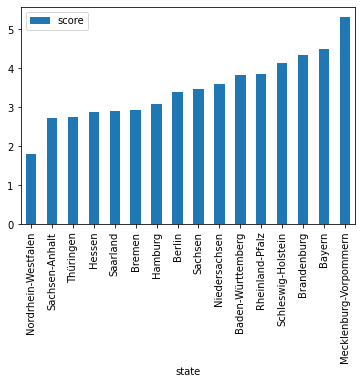

<AxesSubplot:xlabel='state'>

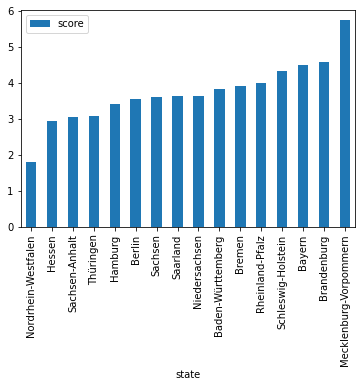

In [139]:
result.sort_values(by='score').plot(kind='bar', x='state', y='score')

In [ ]:
result.sort_values(by='score').plot(kind='bar', x='state', y='score')

In [140]:
result.to_csv('data/all_merged_scaled.csv')